## MODEL EVALUATION

In [60]:
#IMPORT LIBRARIES
import keras
from keras.datasets import mnist
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.optimizers import SGD

In [61]:
#load the mnist dataset
(train_x, train_y) , (test_x, test_y) = mnist.load_data()

In [62]:
#normalize the data
train_x = train_x.astype('float32') / 255
test_x = test_x.astype('float32') / 255

In [63]:
#print the shapes of the data arrays
print("Train Images: ",train_x.shape)
print("Train Labels: ",train_y.shape)
print("Test Images: ",test_x.shape)
print("Test Labels: ",test_y.shape)

Train Images:  (60000, 28, 28)
Train Labels:  (60000,)
Test Images:  (10000, 28, 28)
Test Labels:  (10000,)


In [64]:
#Flatten the images
train_x = train_x.reshape(60000,784)
test_x = test_x.reshape(10000,784)

In [65]:
#Encode the labels to vectors
train_y = keras.utils.to_categorical(train_y,10)
test_y = keras.utils.to_categorical(test_y,10)

In [66]:
#Define the model
model = Sequential()
model.add(Dense(units=256,activation="relu",input_shape=(784,)))
model.add(Dense(units=256,activation="relu"))
model.add(Dense(units=256,activation="relu"))
model.add(Dense(units=10,activation="softmax"))

In [67]:
# Build the model by specifying the input shape
model.build(input_shape=(None, 784))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 256)               200960    
                                                                 
 dense_13 (Dense)            (None, 256)               65792     
                                                                 
 dense_14 (Dense)            (None, 256)               65792     
                                                                 
 dense_15 (Dense)            (None, 10)                2570      
                                                                 
Total params: 335114 (1.28 MB)
Trainable params: 335114 (1.28 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [68]:
#Specify the training components
model.compile(optimizer='Adam',loss="categorical_crossentropy",metrics=["accuracy"])

In [69]:
#load a pretrained weight
model.load_weights("mnistmodel22.h5")


In [70]:
#Evaluate the accuracy of the test dataset
accuracy = model.evaluate(x=test_x,y=test_y,batch_size=32)
print("Accuracy: ",accuracy)

313/313 [==============================] - 2s 4ms/step - loss: 0.1014 - accuracy: 0.9775
Accuracy:  [0.10138635337352753, 0.9775000214576721]


#### Predicting Specific Images

In [83]:
#load a pretrained weight
model.load_weights("mnistmodel22.h5")

In [2]:
#Normalize the test dataset
test_x = test_x.astype('float32') / 255

NameError: name 'test_x' is not defined

In [85]:
#Extract a specific image
img = test_x[0]

In [86]:
#img

In [1]:
#create a flattened copy of the image
test_img = img.reshape(28,28)

NameError: name 'img' is not defined

In [88]:
# Use the 'predict' method to get class probabilities
class_probabilities = model.predict(test_img)

# Find the class with the highest probability for the first image
classname = class_probabilities[0].argmax()

print("Class: ", classname)

1/1 [==============================] - 0s 67ms/step
Class:  8


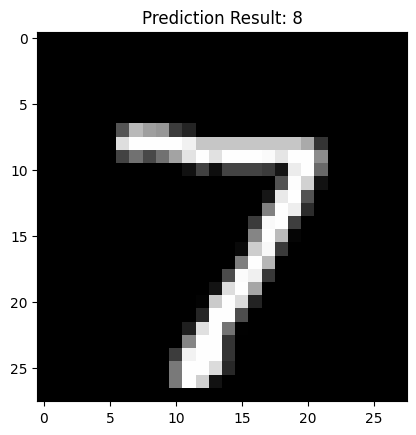

In [89]:
# Display the original non-flattened copy of the image corresponding to test_img[0]
#original_img = test_x[0].reshape(28, 28)  # Reshape to the original image size

import matplotlib.pyplot as plt

plt.title("Prediction Result: %s" % classname)
plt.imshow(test_img, cmap='gray')  # Use cmap='gray' for grayscale images
plt.show()